<a href="https://colab.research.google.com/github/konkuk-gaegul/2nd-Team-Project/blob/main/EDA_PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.8.0
Running on TPU  ['10.13.202.122:8470']
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.13.202.122:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.13.202.122:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
!pip install lightgbm
!pip install xgboost
!pip install eli5 shap catboost
!pip install catboost
!pip install category_encoders

In [ ]:
import tensorflow as tf

from lightgbm import LGBMClassifier
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import cross_validate

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

# ML
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# ensemble(bagging)
from sklearn.ensemble import ( 
  BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor
)

#ensemble(boosting)
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

#stacking
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier, StackingRegressor

# 평가
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, classification_report

# 교차검증
from sklearn.model_selection import (
  KFold, StratifiedKFold, RepeatedStratifiedKFold, cross_val_score, GridSearchCV, train_test_split
)

# Feature Selection
from sklearn.feature_selection import RFE, RFECV

# 시각화(SVM은 회귀계수가 나오지 않습니다.)
import eli5
from eli5.sklearn import PermutationImportance
import shap

# 트리 시각화
import graphviz

# 인코딩
from category_encoders.ordinal import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from category_encoders.ordinal import OrdinalEncoder
from sklearn.model_selection import StratifiedKFold

from sklearn.cluster import KMeans
from catboost import CatBoostClassifier, Pool

# 데이터 업로드
- 변수 설명은 다음 데이콘 링크를 참고한다.

    https://www.dacon.io/competitions/official/235713/talkboard/402821/
    
- 유의해야할 변수 
    - DAYS_BIRTH, DAYS_EMPLOYED, begin_month
    - DAYS or weeks 값이 자료 수집일 기준, 과거이기 때문에 음수를 갖는다.

In [ ]:
train_path = '/content/drive/MyDrive/data/credit/rawData/train.csv'
test_path  = '/content/drive/MyDrive/data/credit/rawData/test.csv'

train = pd.read_csv(train_path)
test  = pd.read_csv(test_path)

In [ ]:
print(train.shape)
print(test.shape)

(26457, 20)
(10000, 19)


In [ ]:
# 26457개 자료
train.head(2)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0


In [ ]:
# 10000개 자료
test.head(2)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0


# DataPreprocessing
- 결측치 처리
- 이상치 처리

## 결측치 처리

In [ ]:
print(train.isna().sum())
print('---------------------')
print(test.isna().sum())

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64
---------------------
index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64


- train, test 자료의 occyp_type에 8171개, 3152개 결측치가 존재한다.

- train 자료를 기준으로 결측의 이유를 살펴보자
    - income_type
        - Pensioner(연금수령자)의 수가 50% 이상을 차지한다.
        - Working 등 소득이 있는 자료도 존재한다.
    - DAYS_EMPLOYED
        - +365243 즉, 양수 데이터는 소득 행위를 하지 않는 것으로 간주
        - 후에 모두 0으로 변환 예정

In [ ]:
print(f'결측치인 자료의 income_type\n{train[train.occyp_type.isna() == True].income_type.value_counts()}\n')
print('--------------------------------')
print(f'결측치인 자료의 DAYS_EMPLOYED\n{train[train.occyp_type.isna() == True].DAYS_EMPLOYED.value_counts()}\n')

결측치인 자료의 income_type
Pensioner               4440
Working                 2312
Commercial associate    1026
State servant            392
Student                    1
Name: income_type, dtype: int64

--------------------------------
결측치인 자료의 DAYS_EMPLOYED
 365243    4438
-302         25
-1613        21
-3079        21
-2014        21
           ... 
-4276         1
-6198         1
-5382         1
-726          1
-473          1
Name: DAYS_EMPLOYED, Length: 963, dtype: int64



In [ ]:
a = train[(train.occyp_type.isna() == True) & (train.DAYS_EMPLOYED > 0) ].copy()
a.head(2)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,1,0,1,0,NaN,1.0,-41.0,2.0
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,NaN,2.0,-37.0,2.0


In [ ]:
a.income_type.value_counts()

Pensioner    4438
Name: income_type, dtype: int64

- 결측치(8171개) 가운데 양수의 근무일을 갖는 자료는 4438개
- train 자료 중, 연금수령자를 살펴보자

In [ ]:
train[train.income_type == 'Pensioner'].income_type.value_counts()

Pensioner    4449
Name: income_type, dtype: int64

- 총 연금수령자 4449명 중, 4438명은 양수의 DAYS_EMPLOYED를 갖는다
    - 이 4438명은 결측치 occyp_type을 retiree(퇴직자)로 간주해야할까?
    - 퇴직자로 대체할 수 있는 정당한 이유인, 나이를 찾아보자.

In [ ]:
(train[ (train.occyp_type.isna() == True ) & (train.income_type == 'Pensioner') ].DAYS_BIRTH / (-365)).value_counts()

57.879452    20
62.947945    20
62.649315    18
61.591781    18
65.123288    17
             ..
59.720548     1
45.723288     1
58.605479     1
63.509589     1
67.150685     1
Name: DAYS_BIRTH, Length: 1323, dtype: int64

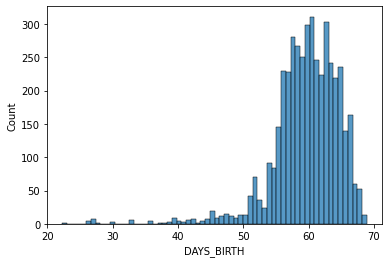

In [ ]:
sns.histplot( data=train, x=(train[ (train.occyp_type.isna() == True ) & (train.income_type == 'Pensioner') ].DAYS_BIRTH / (-365)))

- retiree로 간주할 대상 중, 20~30대가 포함되어 있다.
- 연금수령자의 특성상 50대 이상의 수가 가장 많다.
- 젊은 층(20, 30대)도 충분히 연금수령이 가능하기 때문에 retiree로 간주한다.
    - 운동선수, 군인, 경찰, 소방관 등

- 4438명을 제외한 결측치를 살펴보자

In [ ]:
a = train[ (train.occyp_type.isna() == True ) & (train.income_type != 'Pensioner') ].copy()
a.head(2)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,-15131,-1466,1,0,0,1,NaN,3.0,-38.0,2.0


In [ ]:
a.income_type.value_counts()

Working                 2312
Commercial associate    1026
State servant            392
Student                    1
Name: income_type, dtype: int64

- 나머지 3731개의 자료는 직업을 갖고 있다.
- 수익이 있다고 해석
- 단순히 occyp_type을 무응답으로 기재했다고 간주
    - No response로 대체한다.

## 이상치 처리
- familiy_size가 9, 15, 20인 자료가 존재
- test에는 큰 이상치는 없음
- familiy_size 안에 child_num이 있다고 가정

In [ ]:
train.family_size.value_counts()

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64

In [ ]:
test.family_size.value_counts()

2.0    5357
1.0    1878
3.0    1789
4.0     846
5.0     106
6.0      14
7.0      10
Name: family_size, dtype: int64

In [ ]:
train[ (train.family_size >= 9) ][['child_num', 'family_size']]

,child_num,family_size
8462,14,15.0
9021,14,15.0
10731,19,20.0
25313,7,9.0
25390,14,15.0
25638,7,9.0


- 이상치라 가정했던 familiy_size >= 9인 자료 모두 child_num과 대응한다.
- 따라서 familiy_size가 9이상인 자료는 삭제 및 인덱스 재정렬을 실시한다.

# EDA
- 변수 분석
- 변수끼리 관계

## 변수 시각화

### 연령 분포
- 30대와 40대가 가장 많은 비중을 차지한다.

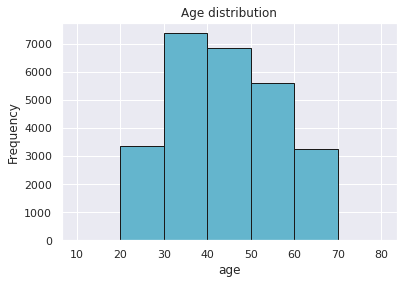

In [ ]:
train['Age'].plot.hist(bins=range(10,81,10), color='c', edgecolor='k')
plt.xlabel('age')
plt.title('Age distribution')
plt.show()

### 연령에 따른 성별 분포
- 20대는 성비가 같지만, 그 외는 여성의 수가 압도적으로 많다.

In [ ]:
temp = train.copy()
temp = temp.astype({'gender': 'object'})
print( temp.dtypes)

gender           object
car               int64
reality           int64
child_num         int64
income_total    float64
income_type      object
edu_type         object
family_type      object
house_type       object
FLAG_MOBIL        int64
work_phone        int64
phone             int64
email             int64
occyp_type       object
family_size     float64
credit          float64
Age             float64
Employed        float64
Month           float64
dtype: object


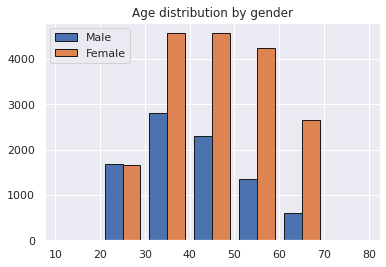

In [ ]:
gender = temp.groupby('gender')
M_group = gender.get_group(1)
F_group = gender.get_group(0)

M = M_group['Age']
F = F_group['Age']

plt.hist([M,F], bins=range(10,81,10), label=['Male', 'Female'],edgecolor='k')
plt.legend(loc='upper left')
plt.title('Age distribution by gender')
plt.show()

### 차량 소유

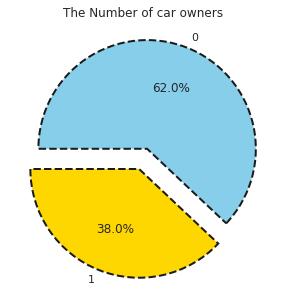

In [ ]:
df1= train.groupby('car').count()['gender']
explode = (0.1, 0.1)
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white')
plt.pie(df1, labels=df1.index,colors=['skyblue','gold'],explode=explode, startangle=180,autopct='%1.1f%%',counterclock=False,wedgeprops = {'edgecolor':'k','linestyle':'--','linewidth':2})
plt.title('The Number of car owners')
plt.show()

### 소득 분류

In [ ]:
it1 = train.groupby('income_type').count()['gender']
it1

income_type
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Working                 13645
Name: gender, dtype: int64

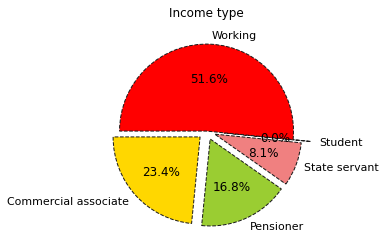

In [ ]:
explode = (0.1, 0.1, 0.1, 0.2, 0.0)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red']
plt.pie(it1,explode=explode,colors=colors, labels=it1.index,
        startangle=180,autopct='%1.1f%%',
        wedgeprops = {'edgecolor':'k','linestyle':'--','linewidth':1},
        textprops={'color':"black"})
title_color = 'black'
plt.title('Income type',color=title_color)
plt.show()

### 직업 분류

In [ ]:
it2 = train.groupby('occyp_type').count()['gender']
it2

occyp_type
Accountants               902
Cleaning staff            403
Cooking staff             457
Core staff               2646
Drivers                  1575
HR staff                   62
High skill tech staff    1040
IT staff                   41
Laborers                 4512
Low-skill Laborers        127
Managers                 2167
Medicine staff            864
No job                   8171
Private service staff     243
Realty agents              63
Sales staff              2539
Secretaries                97
Security staff            424
Waiters/barmen staff      124
Name: gender, dtype: int64

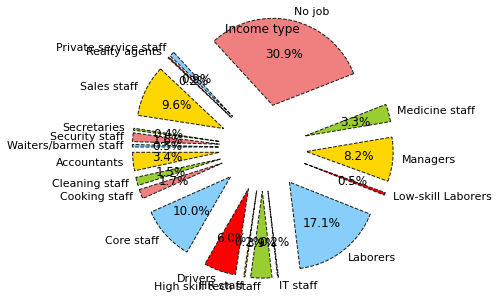

In [ ]:
explode = (0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red']
plt.pie(it,explode=explode,colors=colors, labels=it.index, startangle=180,autopct='%1.1f%%',wedgeprops = {'edgecolor':'k','linestyle':'--','linewidth':1},textprops={'color':"black"})
title_color = 'black'
plt.title('Income type',color=title_color)
plt.show()

# Categorical EDA
- 변수와 타겟의 관계
    - categorical

- 부동산 소유 유무, 직업 유형 등을 기준으로 신용등급의 비율을 알아보자

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        26457 non-null  int64  
 1   car           26457 non-null  int64  
 2   reality       26457 non-null  int64  
 3   child_num     26457 non-null  int64  
 4   income_total  26457 non-null  float64
 5   income_type   26457 non-null  object 
 6   edu_type      26457 non-null  object 
 7   family_type   26457 non-null  object 
 8   house_type    26457 non-null  object 
 9   FLAG_MOBIL    26457 non-null  int64  
 10  work_phone    26457 non-null  int64  
 11  phone         26457 non-null  int64  
 12  email         26457 non-null  int64  
 13  occyp_type    26457 non-null  object 
 14  family_size   26457 non-null  float64
 15  credit        26457 non-null  float64
 16  Age           26457 non-null  float64
 17  Employed      26457 non-null  float64
 18  Month         26457 non-nu

신용등급(0,1,2)에 따라 train_1, 2, 3를 구분해보자

In [ ]:
train_0 = train[ train.credit == 0.0 ]
train_1 = train[ train.credit == 1.0 ]
train_2 = train[ train.credit == 2.0 ]

In [ ]:
# Categorical 그래프 함수 정의
def cat_plot(column):

  f, ax = plt.subplots(1, 3, figsize=(16, 6))


  sns.countplot(x = column,
                data = train_0,
                ax = ax[0],
                order = train_0[column].value_counts().index)
  ax[0].tick_params(labelsize=12)
  ax[0].set_title('credit = 0')
  ax[0].set_ylabel('count')
  ax[0].tick_params(rotation=50)


  sns.countplot(x = column,
                data = train_1,
                ax = ax[1],
                order = train_1[column].value_counts().index)
  ax[1].tick_params(labelsize=12)
  ax[1].set_title('credit = 1')
  ax[1].set_ylabel('count')
  ax[1].tick_params(rotation=50)

  sns.countplot(x = column,
                data = train_2,
                ax = ax[2],
                order = train_2[column].value_counts().index)
  ax[2].tick_params(labelsize=12)
  ax[2].set_title('credit = 2')
  ax[2].set_ylabel('count')
  ax[2].tick_params(rotation=50)
  plt.subplots_adjust(wspace=0.3, hspace=0.3)
  plt.show()

## 성별에 따른 신용 등급
- 모든 등급에서 남성(1)보다 여성(0)의 수가 많다.

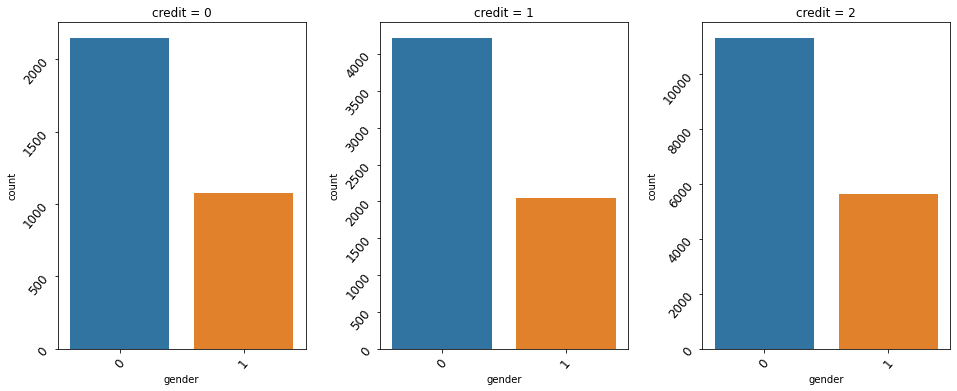

In [ ]:
cat_plot('gender')

## 자동차 소유에 따른 신용 등급
- 모든 등급에 자동차가 없는 사람이 많다.

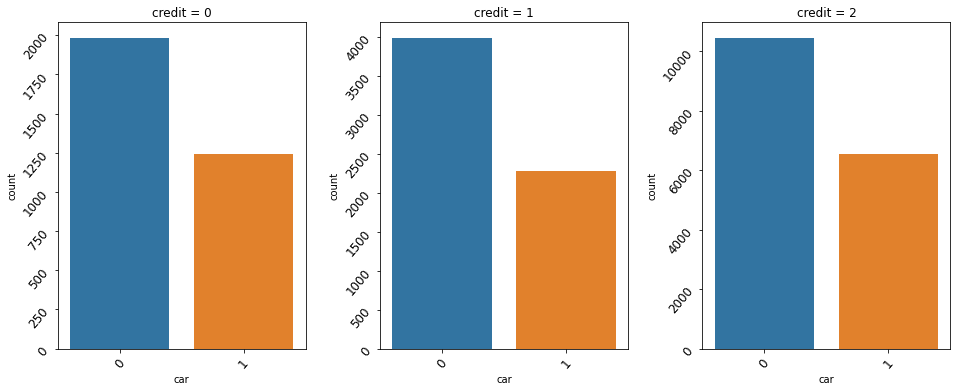

In [ ]:
cat_plot('car')

## 부동산 소유에 따른 신용 등급
- 모든 등급에서 부동산을 소유한 사람이 많다.

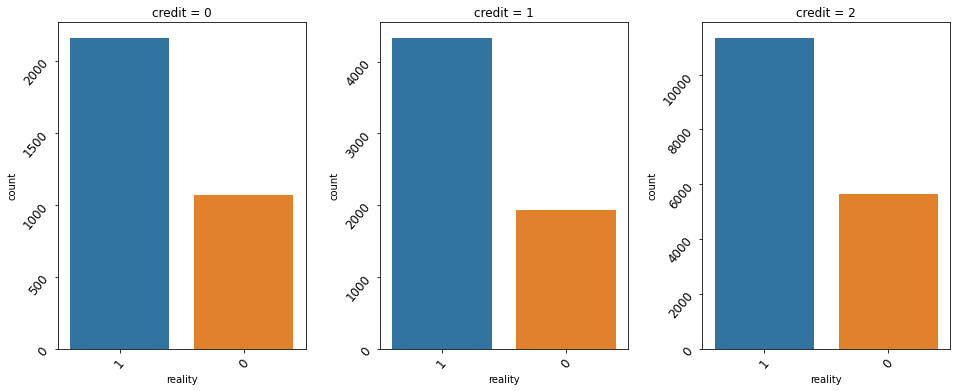

In [ ]:
cat_plot('reality')

## 소득의 분류에 따른 신용 등급
- 모든 등급에서 월급쟁이 > 자영업 > 연금수령자 > 공무원(?) 순서이다.
- 매우 적은 수 지만, 학생은 신용이 낮은 쪽에 속해있다.

In [ ]:
train.income_type.unique()

array(['Commercial associate', 'Working', 'State servant', 'Pensioner',
       'Student'], dtype=object)

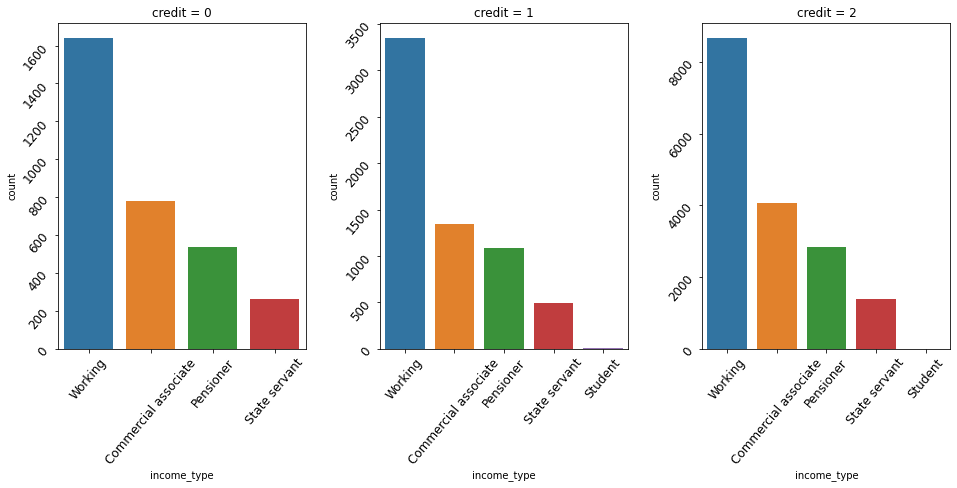

In [ ]:
cat_plot('income_type')

## 교육 수준에 따른 신용 등급
- 모든 등급에서 높은 교육 수준을 갖는 사람의 수가 많다.

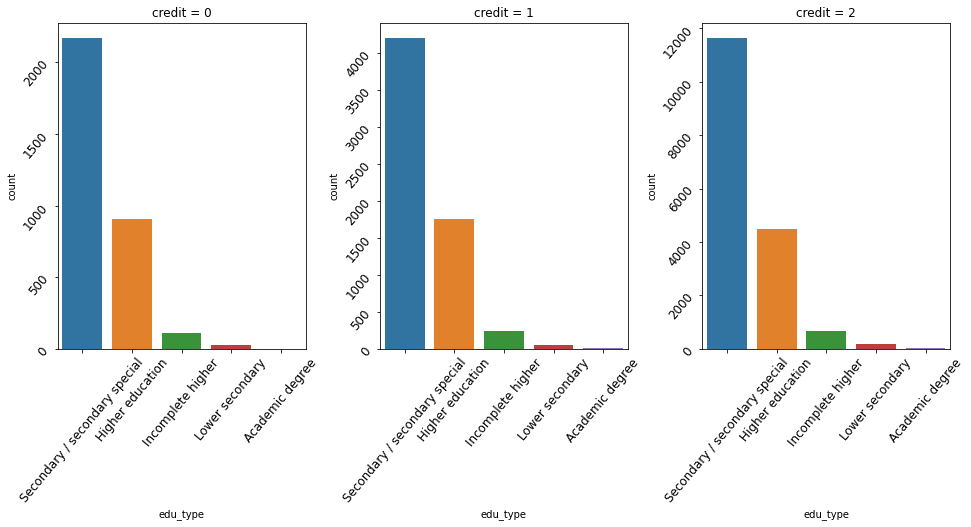

In [ ]:
cat_plot('edu_type')

## 결혼 여부에 따른 신용 등급
- 결혼 여부에 따라서 큰 신용 등급 변화는 없다.

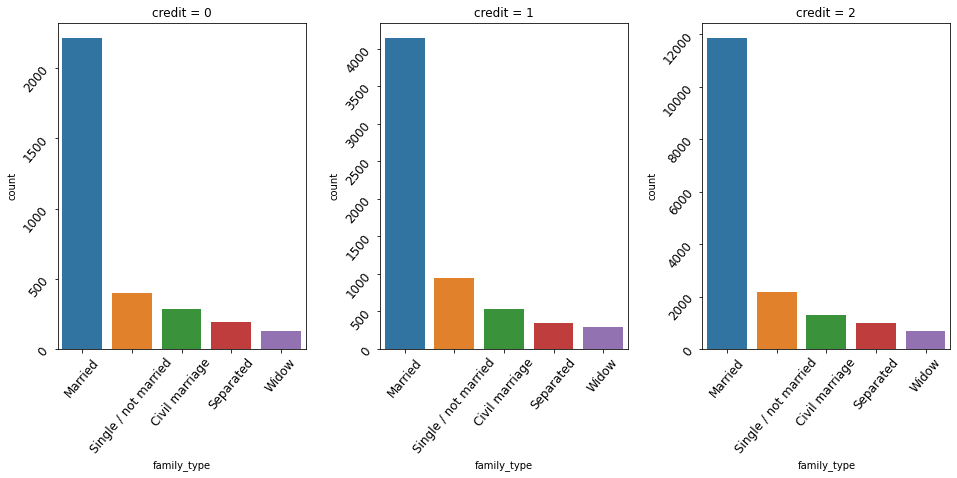

In [ ]:
cat_plot('family_type')

## 주거지에 따른 신용 등급
- 주거지도 마찬가지로 큰 변화는 없다.

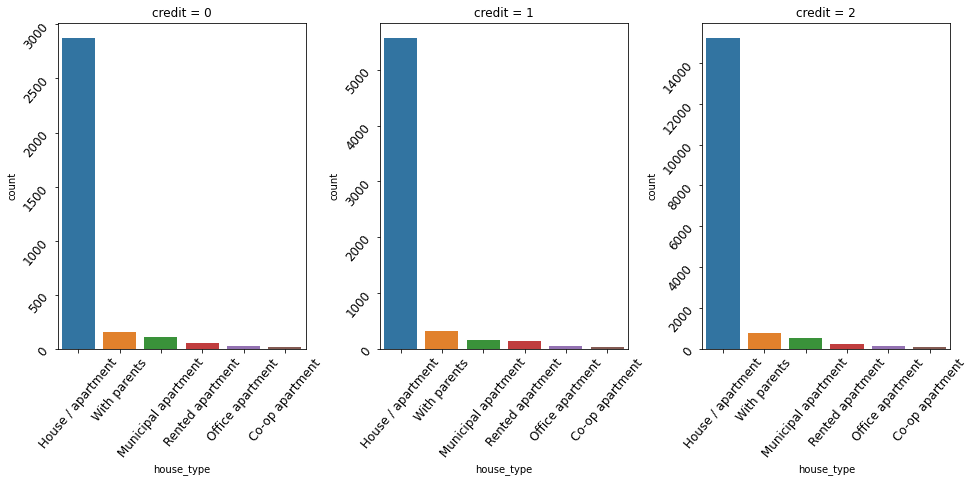

In [ ]:
cat_plot('house_type')

## 직업 분류에 따른 신용 등급
- 직업 분류에 따른 작은 변동만 보인다.

In [ ]:
train.occyp_type.value_counts()

No job                   8171
Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

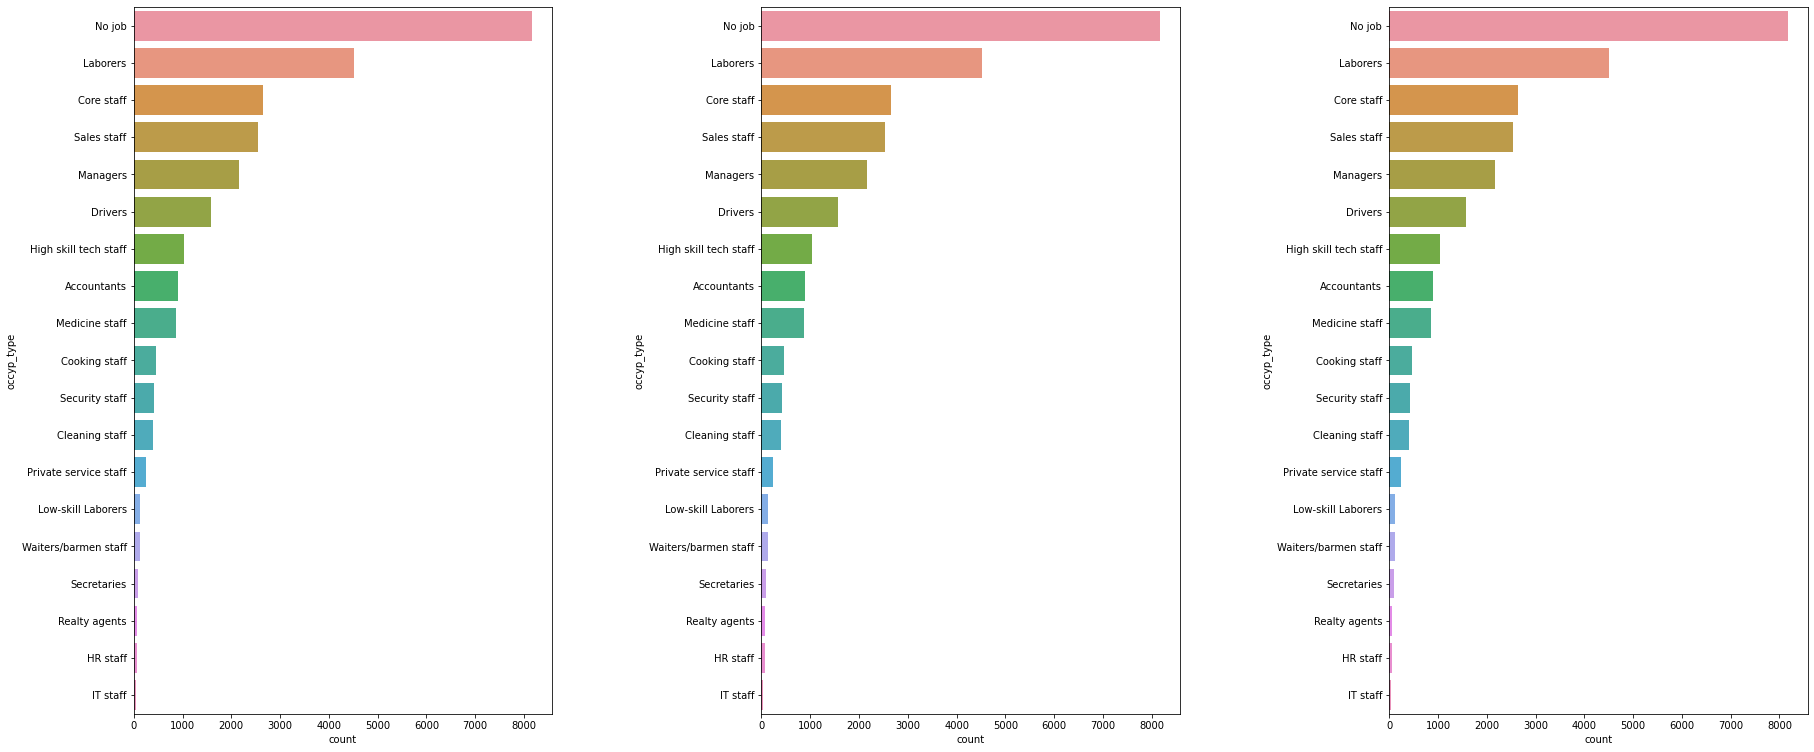

In [ ]:
f, ax = plt.subplots(1, 3, figsize = (30, 13))
sns.countplot(y = 'occyp_type', data = train, order = train['occyp_type'].value_counts().index, ax=ax[0])
sns.countplot(y = 'occyp_type', data = train, order = train['occyp_type'].value_counts().index, ax=ax[1])
sns.countplot(y = 'occyp_type', data = train, order = train['occyp_type'].value_counts().index, ax=ax[2])
plt.subplots_adjust(wspace=0.5, hspace=0.3)
sns.set(font_scale = 1)
plt.show()


- 왜 무직의 비율이 압도적일까...
- 무직자도 신용카드를 발급 받을 수 있는 방법이 있긴하다.
    - 은행권 신용카드의 경우 특정 기간 동안 수십~수백 만원이 예금되어 있어야한다.
    - 그 외에 국민연금, 자동차, 재산세 납부 등이 증면되면 발급 가능하다.


# Numerical EDA
- 자녀 수, 소득 등 수치적으로 표현된 자료에 의해 신용 등급의 차이를 살펴보자

In [ ]:
# Numerical 그래프 함수 정의
def num_plot(column):
  
  fig, axes = plt.subplots(1, 3, figsize=(16, 6))


  sns.distplot(train_0[column],
                ax = axes[0])
  axes[0].tick_params(labelsize=12)
  axes[0].set_title('credit = 0')
  axes[0].set_ylabel('count')

  sns.distplot(train_1[column],
                ax = axes[1])
  axes[1].tick_params(labelsize=12)
  axes[1].set_title('credit = 1')
  axes[1].set_ylabel('count')

  sns.distplot(train_2[column],
                ax = axes[2])
  axes[2].tick_params(labelsize=12)
  axes[2].set_title('credit = 2')
  axes[2].set_ylabel('count')
    
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

### 가족 규모

In [ ]:
train.family_size.value_counts()

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64

In [ ]:
train[ train.family_size >= 9 ]

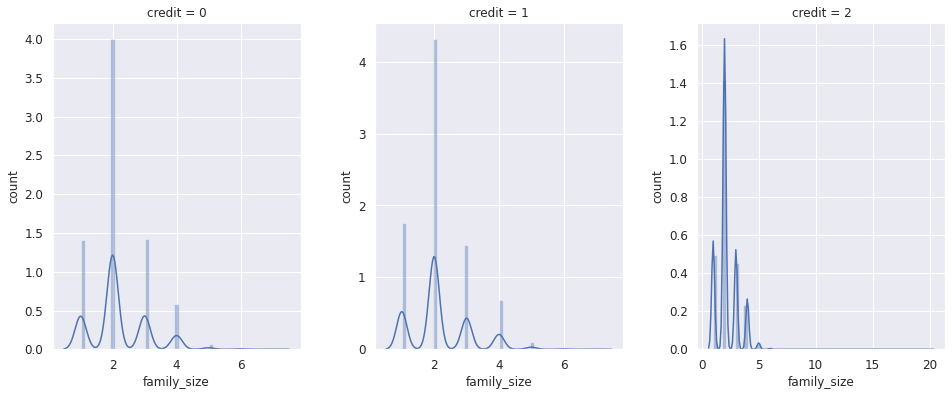

In [ ]:
num_plot('family_size')

## 자녀 수
- 신용등급이 2인 사람 중에 자녀가 7, 14, 19명인 사람이 존재한다(?)
- 중국의 인구가 많은 이유일까...싶다.
- 어찌되었던, 자녀의 수는 신용 등급에 큰 영향을 미쳐보이진 않는다.

In [ ]:
train.child_num.value_counts()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

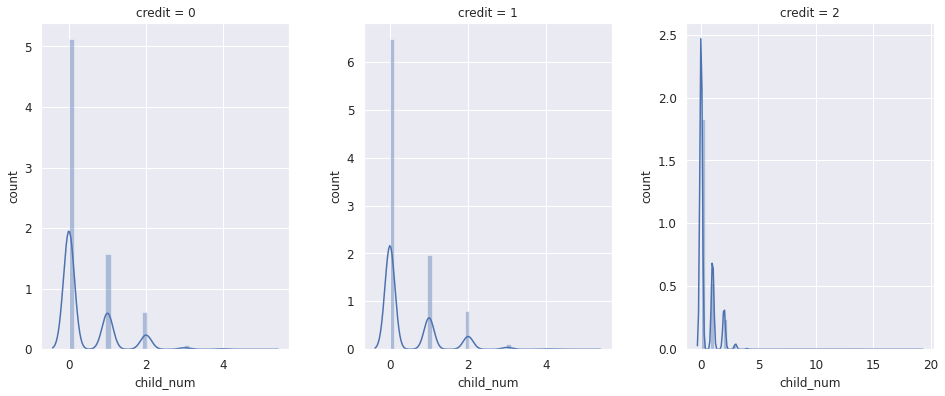

In [ ]:
num_plot("child_num")

- 이상치(7, 14, 19)가 존재

## 소득
- 신용 등급이 2인 사람 중에 고소득자가 몇몇 포함되어 있다.
- 이 점을 제외한다면, 소득에 따라서 신용 등급의 차이는 발견할 수 없다.

In [ ]:
train.income_total

0        202500.0
1        247500.0
2        450000.0
3        202500.0
4        157500.0
           ...   
26452    225000.0
26453    180000.0
26454    292500.0
26455    171000.0
26456     81000.0
Name: income_total, Length: 26457, dtype: float64

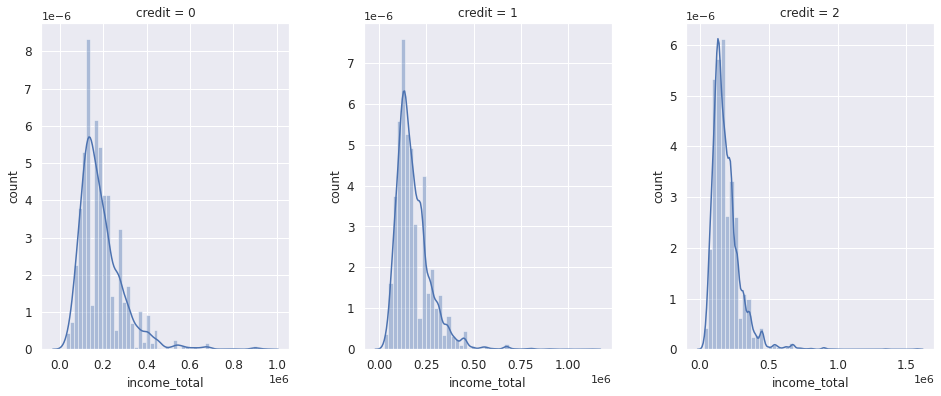

In [ ]:
# x-axis 소득은 백 만 단위
# 원화는 아닌 듯 하다.
num_plot("income_total")

## 연령대
- 연령대도 마찬가지로 특별히 큰 차이점을 발견하지 못한다.

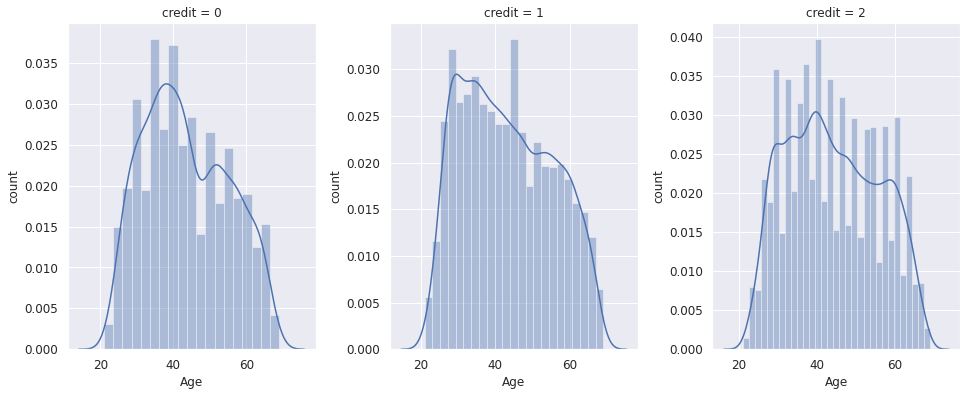

In [ ]:
num_plot("Age")

## 업무 시작 시점

In [ ]:
# 데이터 수집 일 기준, 근무 기간을 나타낸다.

# 0 이상은 약 4400개의 자료가 존재한다.
# 이 자료는 365243만 존재한다.
train[train.Employed > 0].Employed.unique()

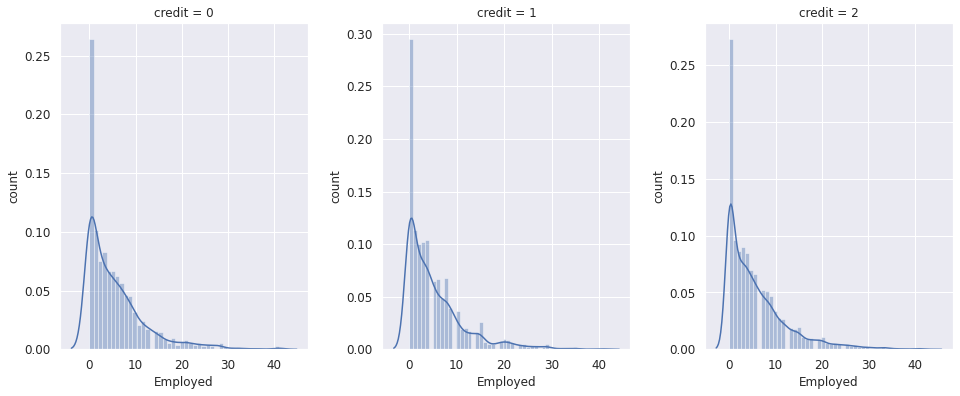

In [ ]:
num_plot("Employed")

- 근무 기간에 따라서도 큰 차이는 발견할 수 없다.

## 신용 카드 발급 시점

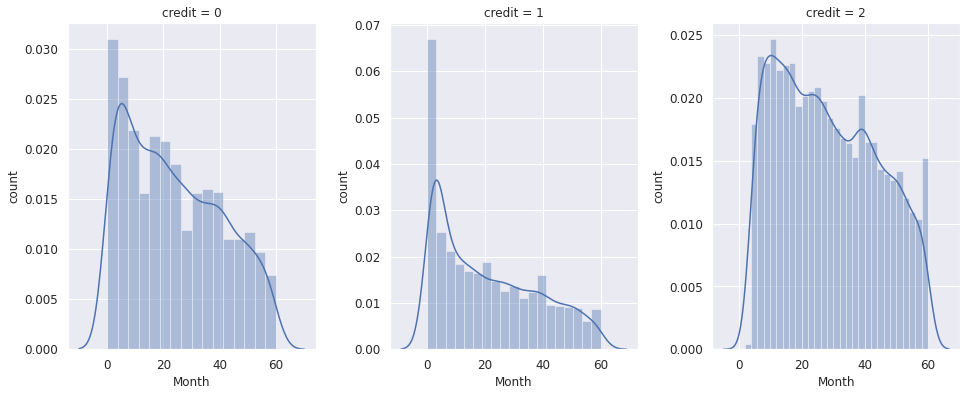

In [ ]:
num_plot("Month")

- 발급 시점이 가까운 자료가 그렇지 않은 자료에 비해 많은 부분을 차지한다.
- 발급하고 시간이 지나면 다른 카드사로 갈아타기 때문이 아닐까?
- 발급 기간을 0 ~ 10, 10 ~ 20, 20 ~ 30 등으로 구간을 나눈 다음
- 구간별로 신용 등급의 비율을 살펴봐도 좋을 것 같다.


# 자료의 불균형 정도

In [ ]:
train.credit.value_counts()

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64

Text(0.5, 1.0, 'the credit ratio')

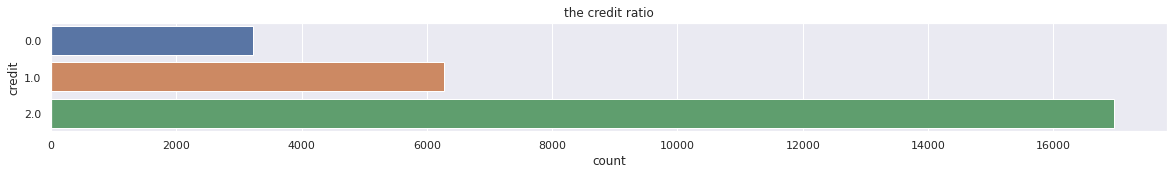

In [ ]:
plt.figure( figsize = (20,2) )
sns.countplot( data = train, y = 'credit')
plt.title( 'the credit ratio' )

- 신용이 낮을 수록, 그 수가 많아진다.
- 좋은 신용(0.0)의 수는 많이 적어서 자료가 불균형하다
- 오버 샘플링 or 언더 샘플링을 적용해보자

## 자료의 분포

### 근무기간, 신용카드 발급 기간, 연령 변환 자료

변환을 실시한 3개의 자료와 FLAG_MOBIL자료를 제외하고 연관관계를 살펴보자

In [ ]:
def makeCorr(x, width=25, height=12):
  plt.figure( figsize=(width, height) )
  mask = np.zeros_like(x.corr(), dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True
  sns.heatmap(x.corr(), annot=True, fmt='.2f', mask=mask, cmap='YlOrBr')
  plt.show()

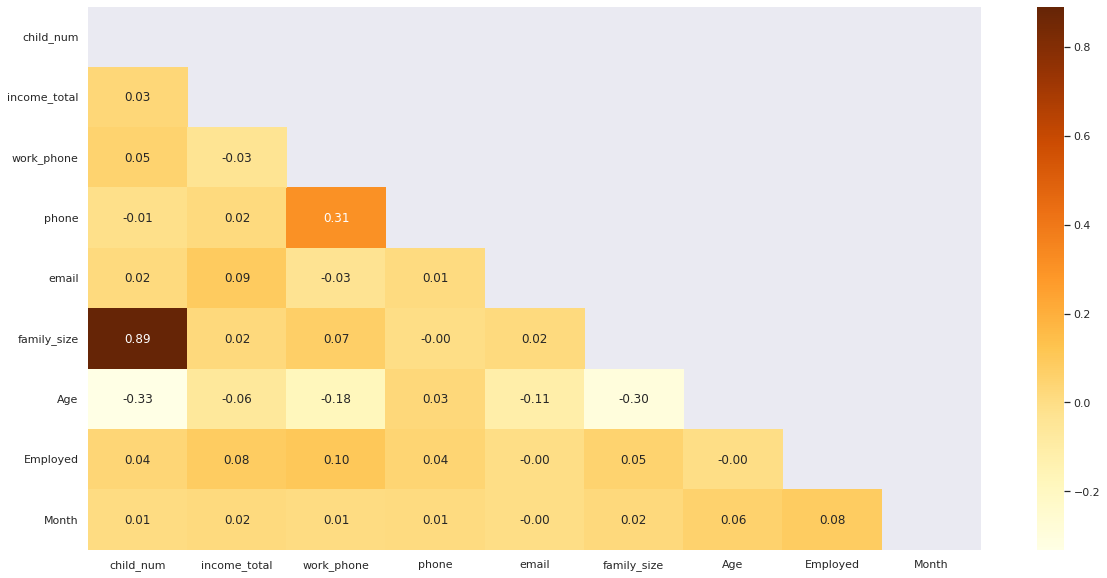

In [ ]:
makeCorr( train.drop(columns=[ 'credit' , 'FLAG_MOBIL',  'car', 'reality', 'gender' ]), width=20, height=10 )

- family_size & child_num : 0.89으로 연관성이 높아보인다.
    - 자녀는 가족에 포함되어 있으므로 연관계수가 높아진 듯 하다.

- phone & work_phone : 0.31
    - 데이터 설명을 참고하면, 집전화와 휴대전화로 구분되어 있다고 한다.
    - 휴대전화 보급률을 고려하면 연관계수가 높은 것은 인정한다.

변수끼리의 연관성은 낮다고 간주해보겠다.